In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [54]:
pd.options.display.min_rows = 100
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [ ]:
# Data Source = https://www.kaggle.com/noaa/hurricane-database

## Let's Load and Clean the Data

In [ ]:
# Load in and combine the hurricane databases
atlantic_storms = pd.read_csv('hurricane-database/atlantic.csv')
pacific_storms = pd.read_csv('hurricane-database/pacific.csv')
all_storms = atlantic_storms.append(pacific_storms)

In [ ]:
# Replace -999 with NaN
all_storms = all_storms.replace(-999, np.nan)
all_storms = all_storms.replace(-99, np.nan)

In [ ]:
# There's probably an easier way to do this, but 8 didgit numbers are a bad way to show year month and day
all_storms['Year'] = all_storms['Date'].astype(str).str.slice(0, 4)
all_storms['Month'] = all_storms['Date'].astype(str).str.slice(4, 6)
all_storms['Day'] = all_storms['Date'].astype(str).str.slice(6, 8)
all_storms['Hour'] = all_storms['Time'].astype(str).str[:-2]
all_storms['Minute'] = all_storms['Time'].astype(str).str[-2:]

In [ ]:
# Clean the hours and minutes
all_storms['Hour'] = all_storms['Hour'].replace('', 0)
all_storms['Minute'] = all_storms['Minute'].astype(str).replace('0', '00')

In [ ]:
# And now add those together and convert to datetime
all_storms['Datetime'] = all_storms['Year'] + '-' + all_storms['Month'] + '-' + all_storms['Day'] + ' ' + all_storms['Hour'].astype(str) + ':' + all_storms['Minute']
all_storms['Datetime'] = pd.to_datetime(all_storms['Datetime'])

## Let's Do Some Cleaning

In [ ]:
# Hawaii became our 50th state in 1959, so before then we had less land to be hit by storms, which would skew the data
all_storms = all_storms[all_storms['Year'].astype(int) >= 1959]

In [ ]:
# I want to narrow this down to Hurricanes specifically
all_storms['Status'].unique()

In [ ]:
# This removes the spaces differenciating ' HU' and ' HU '
all_storms.Status = all_storms.Status.str.strip(' ')

In [11]:
# Much better
all_storms.Status.unique()

array(['TD', 'TS', 'HU', 'EX', 'DB', 'SD', 'SS', 'WV', 'LO', 'ET', 'PT',
       'ST'], dtype=object)

In [12]:
all_storms['Status'].value_counts()

TS    16299
TD    14340
HU    11594
LO     2822
EX     2108
SS      564
DB      304
SD      297
ET      152
WV      116
PT        6
ST        6
Name: Status, dtype: int64

## Let's Looks At The DIfferent Storm Types

In [24]:
storm_types = all_storms[{'Maximum Wind', 'Minimum Pressure'}].groupby(all_storms['Status']).mean()

In [25]:
storm_types['Count'] = all_storms['ID'].groupby(all_storms.Status).count()

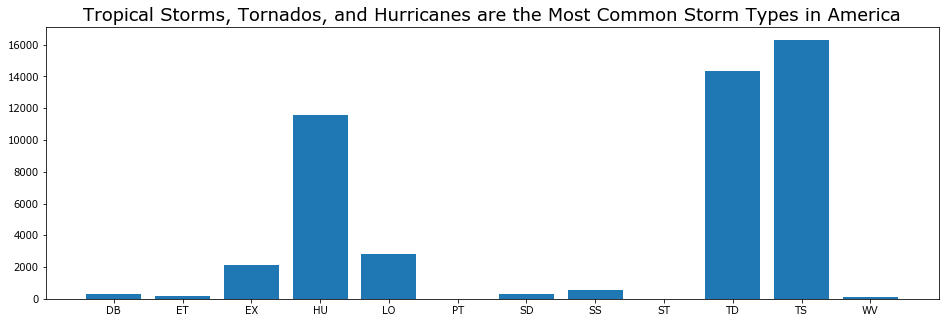

In [39]:
plt.figure(figsize=(16, 5))
plt.title('Tropical Storms, Tornados, and Hurricanes are the Most Common Storm Types in America', fontsize=18)

plt.bar(storm_types.index, storm_types.Count);

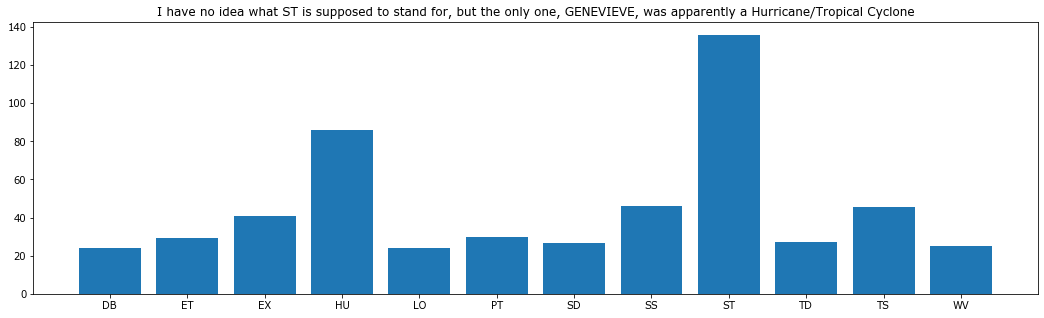

In [58]:
plt.figure(figsize=(18, 5))
plt.title("I have no idea what ST is supposed to stand for, but the only one, GENEVIEVE, was apparently a Hurricane/Tropical Cyclone")

plt.bar(storm_types.index, storm_types['Maximum Wind']);

In [55]:
all_storms[all_storms['Status'] == 'ST']

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Year,Month,Day,Hour,Minute,Datetime
24802,EP072014,GENEVIEVE,20140807,600,,ST,14.5N,179.8E,130.0,926.0,120.0,90.0,80.0,110.0,60.0,40.0,40.0,50.0,40.0,20.0,20.0,30.0,2014,08,07,6,00,2014-08-07 06:00:00
24803,EP072014,GENEVIEVE,20140807,1200,,ST,15.1N,178.7E,140.0,918.0,120.0,90.0,80.0,110.0,60.0,40.0,40.0,50.0,40.0,20.0,20.0,30.0,2014,08,07,12,00,2014-08-07 12:00:00
24804,EP072014,GENEVIEVE,20140807,1800,,ST,15.6N,177.4E,140.0,918.0,120.0,90.0,80.0,110.0,60.0,40.0,40.0,50.0,40.0,20.0,20.0,30.0,2014,08,07,18,00,2014-08-07 18:00:00
24805,EP072014,GENEVIEVE,20140808,0,,ST,16.3N,176.4E,140.0,918.0,120.0,90.0,80.0,110.0,60.0,40.0,40.0,50.0,40.0,20.0,20.0,30.0,2014,08,08,0,00,2014-08-08 00:00:00
24806,EP072014,GENEVIEVE,20140808,600,,ST,16.9N,176.0E,135.0,922.0,135.0,115.0,115.0,135.0,90.0,75.0,75.0,90.0,50.0,40.0,40.0,50.0,2014,08,08,6,00,2014-08-08 06:00:00
24807,EP072014,GENEVIEVE,20140808,1200,,ST,17.5N,175.9E,130.0,926.0,120.0,120.0,110.0,110.0,80.0,80.0,70.0,70.0,55.0,55.0,40.0,40.0,2014,08,08,12,00,2014-08-08 12:00:00


## Now Let's Make A Hurricane DataFrame

In [59]:
# And let's make a hurricane specific DataFrame
all_hurricanes = all_storms[all_storms['Status'] == 'HU']

In [60]:
all_hurricanes.head(3)

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Year,Month,Day,Hour,Minute,Datetime
25301,AL031959,UNNAMED,19590619,600,,HU,34.5N,70.0W,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1959,06,19,6,00,1959-06-19 06:00:00
25302,AL031959,UNNAMED,19590619,1200,,HU,38.4N,65.0W,75.0,974.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1959,06,19,12,00,1959-06-19 12:00:00
25331,AL041959,CINDY,19590708,1200,,HU,32.4N,78.1W,65.0,995.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1959,07,08,12,00,1959-07-08 12:00:00


## Let's Make A Few More Dataframes

In [61]:
all_hurricanes.columns

Index(['ID', 'Name', 'Date', 'Time', 'Event', 'Status', 'Latitude',
       'Longitude', 'Maximum Wind', 'Minimum Pressure', 'Low Wind NE',
       'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE',
       'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW',
       'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW', 'Year',
       'Month', 'Day', 'Hour', 'Minute', 'Datetime'],
      dtype='object')

In [62]:
# Let's make a Dataframe that narrows down info on each hurricane
each_hurricane = pd.DataFrame(all_hurricanes['Maximum Wind'].groupby(all_hurricanes['ID']).max())
each_hurricane['Average Max Speed'] = all_hurricanes['Maximum Wind'].groupby(all_hurricanes['ID']).mean()
each_hurricane['Start Date'] = all_hurricanes['Datetime'].groupby(all_hurricanes['ID']).min()
each_hurricane['End Date'] = all_hurricanes['Datetime'].groupby(all_hurricanes['ID']).max()

In [63]:
# Since the info on the hurricanes was reported every 6 hours,let's break it down as such
each_hurricane['Length of Time Rounded Up To Nearest 6 Hours'] = all_hurricanes['Datetime'].groupby(all_hurricanes['ID']).max() - all_hurricanes['Datetime'].groupby(all_hurricanes['ID']).min()

In [64]:
# Order by Date not ID
each_hurricane.sort_index(by=['Start Date'], inplace=True)

C:\Users\nolan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


In [65]:
each_hurricane

,Maximum Wind,Average Max Speed,Start Date,End Date,Length of Time Rounded Up To Nearest 6 Hours
ID,,,,,
AL031959,75.0,70.000000,1959-06-19 06:00:00,1959-06-19 12:00:00,0 days 06:00:00
AL041959,65.0,65.000000,1959-07-08 12:00:00,1959-07-09 04:00:00,0 days 16:00:00
AL051959,75.0,70.000000,1959-07-24 12:00:00,1959-07-25 06:00:00,0 days 18:00:00
CP011959,130.0,110.000000,1959-08-02 00:00:00,1959-08-07 06:00:00,5 days 06:00:00
EP091959,75.0,75.000000,1959-09-04 00:00:00,1959-09-11 00:00:00,7 days 00:00:00
CP021959,150.0,105.666667,1959-09-06 06:00:00,1959-09-09 18:00:00,3 days 12:00:00
AL071959,65.0,65.000000,1959-09-11 12:00:00,1959-09-11 15:00:00,0 days 03:00:00
EP101959,75.0,74.736842,1959-09-21 12:00:00,1959-09-26 00:00:00,4 days 12:00:00
AL081959,115.0,85.000000,1959-09-22 18:00:00,1959-09-30 00:00:00,7 days 06:00:00


In [66]:
# Let's get a per year DataFrame going
annual_hurricane_data = pd.DataFrame(each_hurricane['End Date'].groupby(each_hurricane['Start Date'].dt.year).count())
annual_hurricane_data.index.rename('Year', inplace=True)
annual_hurricane_data.columns = ['Hurricane Count']

In [67]:
# And let's add some other info to that DataFrame
annual_hurricane_data['Longest Hurricane'] = each_hurricane['Length of Time Rounded Up To Nearest 6 Hours'].groupby(each_hurricane['Start Date'].dt.year).max()
annual_hurricane_data['Max Wind Speed'] = each_hurricane['Maximum Wind'].groupby(each_hurricane['Start Date'].dt.year).max()

In [68]:
annual_hurricane_data.head()

,Hurricane Count,Longest Hurricane,Max Wind Speed
Year,,,
1959,12,7 days 18:00:00,150.0
1960,9,11 days 12:00:00,125.0
1961,10,9 days 12:00:00,150.0
1962,5,4 days 12:00:00,100.0
1963,11,12 days 12:00:00,125.0


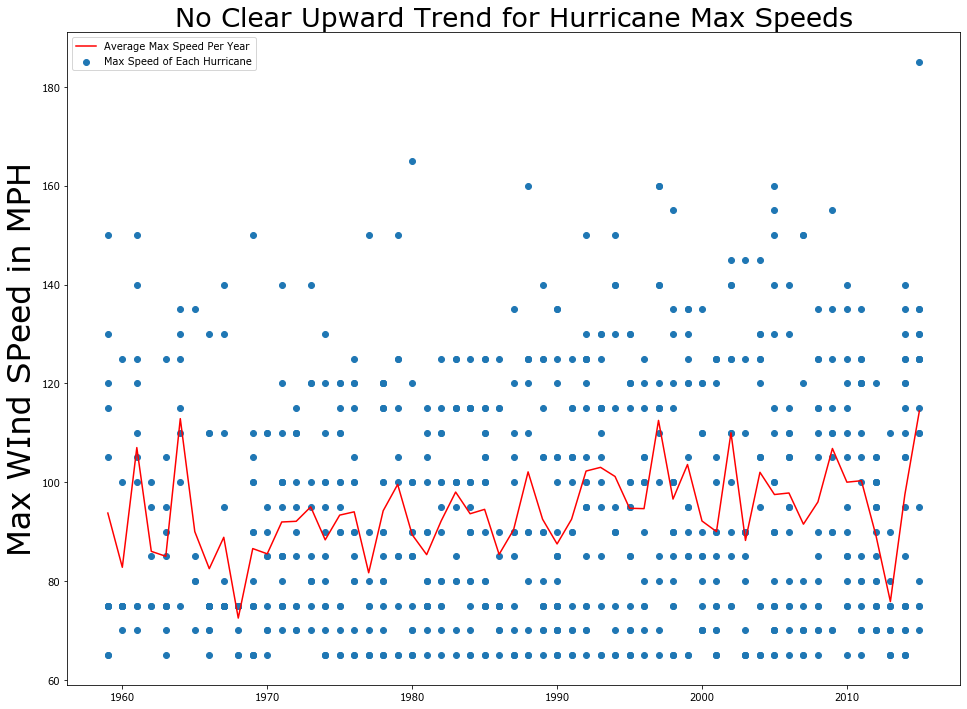

In [69]:
# Let's look for some annual trends

plt.figure(figsize=(16,12))

plt.title('No Clear Upward Trend for Hurricane Max Speeds', fontsize=27)
plt.ylabel('Max WInd SPeed in MPH', fontsize=32)

plt.scatter(each_hurricane['Start Date'].dt.year, each_hurricane['Maximum Wind'], label='Max Speed of Each Hurricane')
plt.plot(each_hurricane['Maximum Wind'].groupby(each_hurricane['Start Date'].dt.year).mean(), color='red', label='Average Max Speed Per Year');

plt.legend();

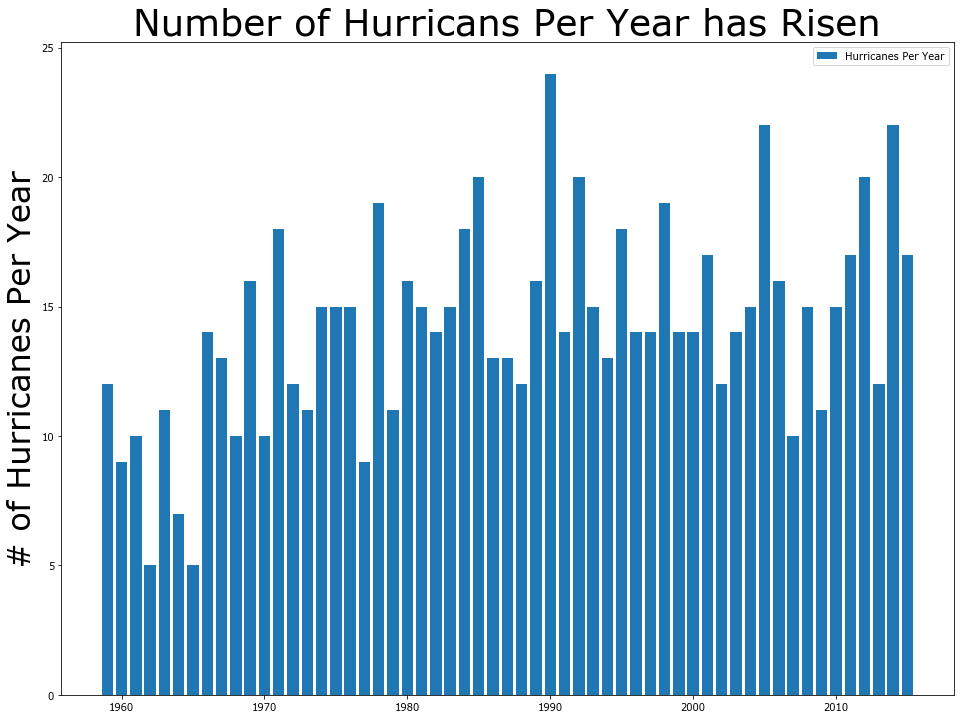

In [70]:
plt.figure(figsize=(16,12))

plt.title('Number of Hurricans Per Year has Risen', fontsize=37)
plt.ylabel('# of Hurricanes Per Year', fontsize=32)

plt.bar(annual_hurricane_data.index, annual_hurricane_data['Hurricane Count'], label='Hurricanes Per Year')
plt.plot()

plt.legend();

## How About Tornados?

In [71]:
# Let's make another DataFrame
all_tornados = all_storms[all_storms.Status == 'TD']

In [72]:
all_tornados.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Year,Month,Day,Hour,Minute,Datetime
25256,AL011959,ARLENE,19590528,600,,TD,23.3N,86.5W,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1959,05,28,6,00,1959-05-28 06:00:00
25257,AL011959,ARLENE,19590528,1200,,TD,24.0N,87.0W,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1959,05,28,12,00,1959-05-28 12:00:00
25258,AL011959,ARLENE,19590528,1800,,TD,24.7N,87.5W,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1959,05,28,18,00,1959-05-28 18:00:00
25270,AL011959,ARLENE,19590531,1200,,TD,30.9N,91.2W,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1959,05,31,12,00,1959-05-31 12:00:00
25271,AL011959,ARLENE,19590531,1800,,TD,31.5N,90.9W,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1959,05,31,18,00,1959-05-31 18:00:00


C:\Users\nolan\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


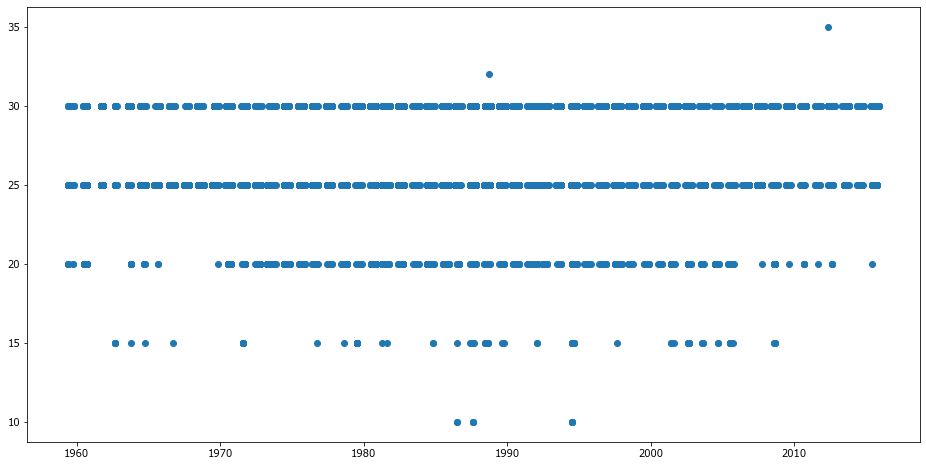

In [73]:
plt.figure(figsize=(16,8))

plt.scatter(all_tornados.Datetime, all_tornados['Maximum Wind']);

In [ ]:
all_tornados.groupby(all)